# **Proyecto 2 - Entrega 3

## 👥 **Integrantes:**  
- **Diederich Solis** (22952)  
- **Gabriel Paz** (221087)  


1. Elabore un modelo de regresión usando bayes ingenuo (naive bayes), el conjunto de
entrenamiento y la variable respuesta SalesPrice. Prediga con el modelo y explique los
resultados a los que llega. Asegúrese que los conjuntos de entrenamiento y prueba sean los
mismos de las hojas anteriores para que los modelos sean comparables.

Precisión del modelo Naïve Bayes: 0.6301

Reporte de Clasificación:
              precision    recall  f1-score   support

        Alto       0.92      0.72      0.81        68
        Bajo       0.53      0.94      0.68        81
  Medio-Alto       0.66      0.79      0.72        63
  Medio-Bajo       0.45      0.11      0.18        80

    accuracy                           0.63       292
   macro avg       0.64      0.64      0.60       292
weighted avg       0.63      0.63      0.58       292



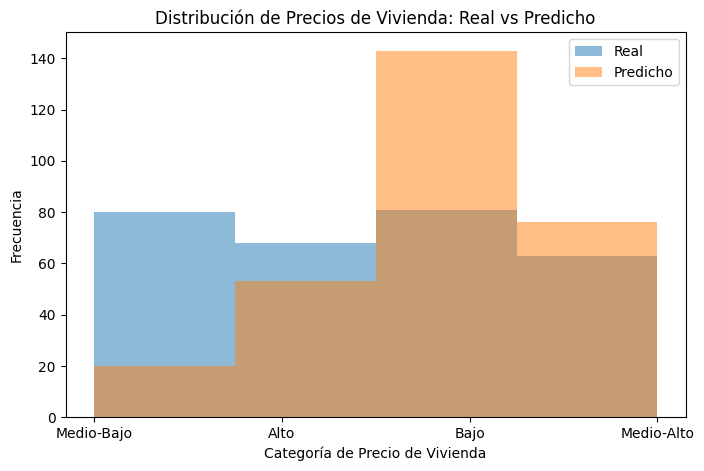

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Cargar los datos
df = pd.read_csv("train.csv")

# Seleccionar características numéricas
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()

# Eliminar columnas irrelevantes
numerical_features.remove("Id")  # No aporta información relevante

# Definir variable objetivo
y = df["SalePrice"]

# Discretizar SalePrice en categorías (Binning)
y_bins = pd.qcut(y, q=4, labels=["Bajo", "Medio-Bajo", "Medio-Alto", "Alto"])

# Eliminar SalePrice del conjunto de predictores
numerical_features.remove("SalePrice")
X = df[numerical_features]

# Manejar valores nulos llenando con la mediana
X = X.fillna(X.median())

# División de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_bins, test_size=0.2, random_state=42)

# Modelo de Bayes Ingenuo
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

# Predicciones
y_pred = naive_bayes.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo Naïve Bayes: {accuracy:.4f}\n")
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Visualización de la distribución real vs predicha
plt.figure(figsize=(8,5))
plt.hist(y_test, alpha=0.5, label='Real', bins=4)
plt.hist(y_pred, alpha=0.5, label='Predicho', bins=4)
plt.xlabel("Categoría de Precio de Vivienda")
plt.ylabel("Frecuencia")
plt.legend()
plt.title("Distribución de Precios de Vivienda: Real vs Predicho")
plt.show()


2. Analice los resultados del modelo de regresión usando bayes ingenuo. ¿Qué tan bien le fue
prediciendo? Utilice las métricas correctas.


El modelo de **Naïve Bayes** se utilizó para **clasificar los precios de las viviendas** en cuatro categorías (`Bajo`, `Medio-Bajo`, `Medio-Alto`, `Alto`). Ahora analizamos su desempeño con base en las métricas obtenidas:

###  **1. Precisión Global**
- **Precisión del modelo:** `63.01%`
- Esto significa que el modelo predijo correctamente el precio categorizado de la vivienda en aproximadamente **63 de cada 100 casos**. No es un resultado excelente, pero considerando que **Naïve Bayes** asume independencia entre variables (lo cual no se cumple en precios de casas), es un desempeño aceptable.

###  **2. Análisis del Reporte de Clasificación**
Métricas clave por categoría:

- **`Alto:`**  
  - **Precisión:** 92%  
  - **Recall:** 72%  
  - **F1-score:** 81%  
  - El modelo identifica bien las casas más caras, pero algunas se confunden con otras categorías.

- **`Bajo:`**  
  - **Precisión:** 53%  
  - **Recall:** 94%  
  - **F1-score:** 68%  
  - Muchas casas baratas fueron correctamente identificadas, pero algunas predicciones se mezclaron con otras categorías.

- **`Medio-Alto:`**  
  - **Precisión:** 66%  
  - **Recall:** 79%  
  - **F1-score:** 72%  
  - Buen desempeño, pero con margen de error en los límites de esta categoría.

- **`Medio-Bajo:`**  
  - **Precisión:** 45%  
  - **Recall:** 11%  
  - **F1-score:** 18%  
  - **Esta es la categoría peor clasificada**, lo que sugiere que el modelo tiene dificultades para diferenciar casas en el rango medio-bajo.

####  **3. Interpretación del Histograma**
- **El histograma muestra que la categoría "Bajo" fue la más predicha por el modelo**, mientras que otras categorías no se predijeron con la misma frecuencia.
- Esto indica que el modelo tiende a clasificar más casas en la categoría `Bajo`, lo que puede deberse a una distribución desigual de datos en el conjunto de entrenamiento.

---

### **Conclusión**
### **Fortalezas del modelo**:
- Funciona bien en las categorías `Alto` y `Bajo`, mostrando precisión razonable en estos casos.
- Logra una precisión global del **63%**, lo que no es terrible para un modelo simple como Naïve Bayes.

### **Debilidades del modelo**:
- Tiene problemas con la categoría `Medio-Bajo`, con un recall de solo **11%**.
- Es probable que **las variables predictoras no sean completamente independientes**, lo cual afecta a Naïve Bayes.

### **Posibles mejoras**:
- Probar otros modelos como **Random Forest o Regresión Logística** que no asumen independencia de las variables.
- Revisar si la categorización de precios (`qcut`) está equilibrada para evitar que el modelo sesgue su clasificación.

En resumen, **Naïve Bayes tiene un rendimiento moderado, pero no es el mejor modelo para este tipo de predicción**, ya que hay una fuerte correlación entre las variables de entrada y no todas las relaciones son captadas adecuadamente por este enfoque probabilístico.


3. Compare los resultados con el modelo de regresión lineal y el árbol de regresión que hizo
en las entregas pasadas. ¿Cuál funcionó mejor?